In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
df=pd.read_csv("mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [6]:
df.shape

(8124, 23)

In [7]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
target = 'class' # The class we want to predict
labels = df[target]

features = df.drop(target, axis=1) # Remove the target class from the dataset

In [9]:
#target, edible or poisonous 
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [10]:
categorical = features.columns # Since every fearure is categorical we use features.columns
features = pd.concat([features, pd.get_dummies(features[categorical])], axis=1) # Convert every categorical feature with one hot encoding
features.drop(categorical, axis=1, inplace=True) # Drop the original feature, leave only the encoded ones

labels = pd.get_dummies(labels)['p'] # Encode the target class, 1 is deadly 0 is safe to eat

In [11]:
#checking for nulls
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [12]:
for col in df.columns: 
    print(df[col].value_counts())

e    4208
p    3916
Name: class, dtype: int64
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64
f    4748
t    3376
Name: bruises, dtype: int64
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
f    7914
a     210
Name: gill-attachment, dtype: int64
c    6812
w    1312
Name: gill-spacing, dtype: int64
b    5612
n    2512
Name: gill-size, dtype: int64
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
t    4608
e    3516
Name: stalk-shape, dtype: int64
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64
s    5176
k    2372
f     552
y      24
Name: stalk-surf

In [13]:
#re-assign all binary columns to 0 and 1
df['bruises']=np.where(df['bruises']=='t',1,df['bruises'])
df['bruises']=np.where(df['bruises']=='f',0,df['bruises'])

In [14]:
df['bruises'].value_counts()

0    4748
1    3376
Name: bruises, dtype: int64

In [15]:
df['gill-attachment']=np.where(df['gill-attachment']=='f',0,df['gill-attachment'])
df['gill-attachment']=np.where(df['gill-attachment']=='a',1,df['gill-attachment'])

In [16]:
df['gill-spacing']=np.where(df['gill-spacing']=='c',0,df['gill-spacing'])
df['gill-spacing']=np.where(df['gill-spacing']=='w',1,df['gill-spacing'])
df['gill-size']=np.where(df['gill-size']=='b',0,df['gill-size'])
df['gill-size']=np.where(df['gill-size']=='n',1,df['gill-size'])
df['stalk-shape']=np.where(df['stalk-shape']=='e',0,df['stalk-shape'])
df['stalk-shape']=np.where(df['stalk-shape']=='t',1,df['stalk-shape'])

In [17]:
#assign missing values to 'other'
df['stalk-root']=np.where(df['stalk-root']=='?','other',df['stalk-root'])

In [18]:
#dropping veil-type column since values are all the same
#no use in the model
df.drop(columns='veil-type',inplace=True)

In [19]:
#re-assign to actual ring number, 0, 1, 2 -> numerical data
df['ring-number']=np.where(df['ring-number']=='n',0,df['ring-number'])
df['ring-number']=np.where(df['ring-number']=='o',1,df['ring-number'])
df['ring-number']=np.where(df['ring-number']=='t',2,df['ring-number'])

In [20]:
df.shape

(8124, 22)

In [17]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,0,n,0,0,0,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


C:\Users\DEEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


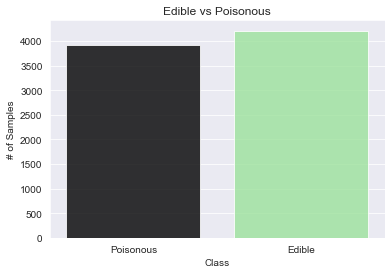

In [23]:
#target variable countplot
#balanced target
sns.set_style('darkgrid')
plt.figure()
fig1=sns.countplot(df['class'], alpha =.80, palette= ['black','lightgreen'])
plt.title('Edible vs Poisonous')
plt.ylabel('# of Samples')
plt.xlabel('Class')
fig1.set(xticklabels=['Poisonous','Edible'])
plt.show()

C:\Users\DEEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DEEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DEEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DEEL\anaconda3\lib\site-p

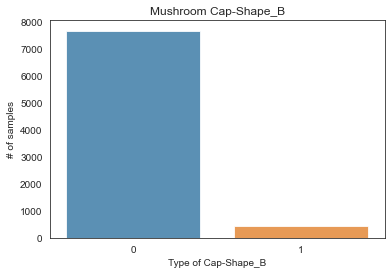

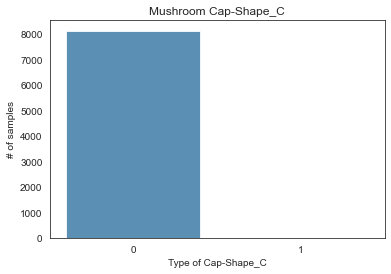

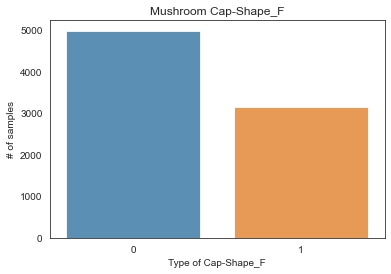

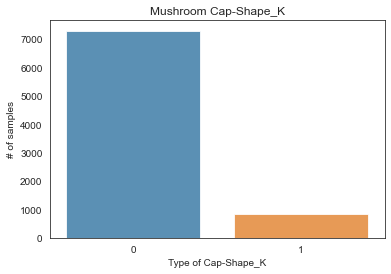

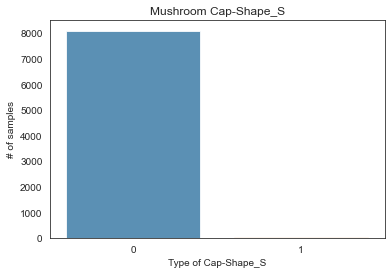

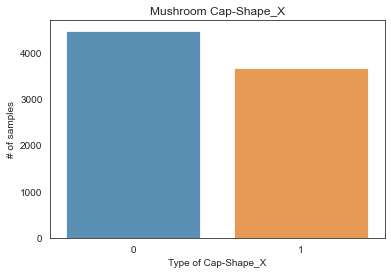

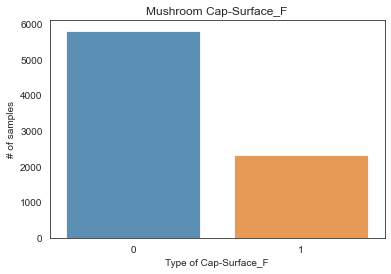

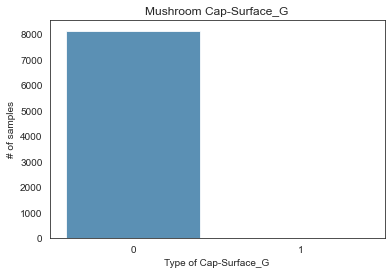

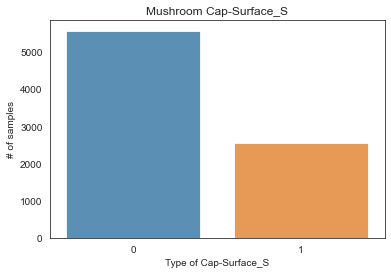

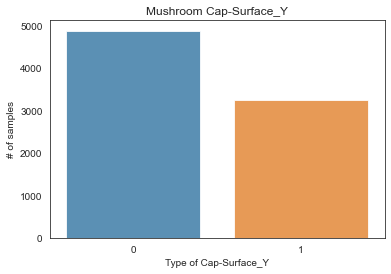

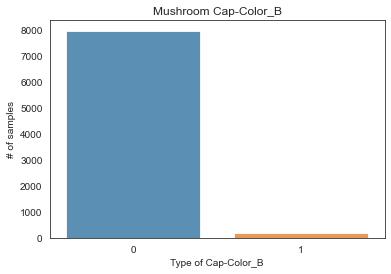

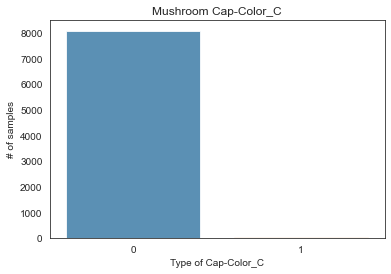

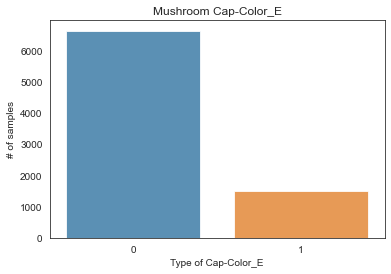

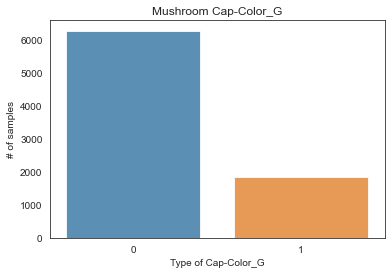

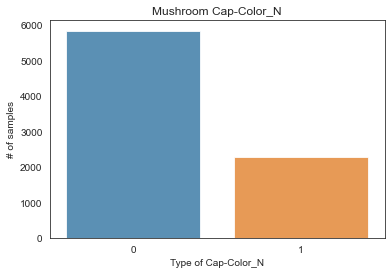

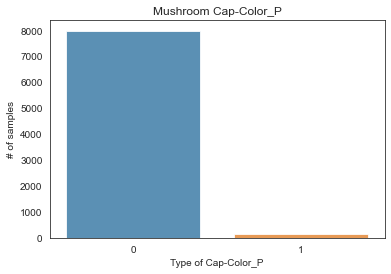

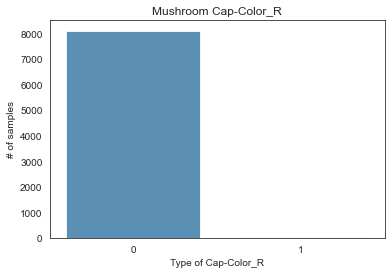

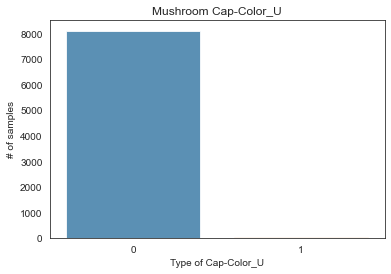

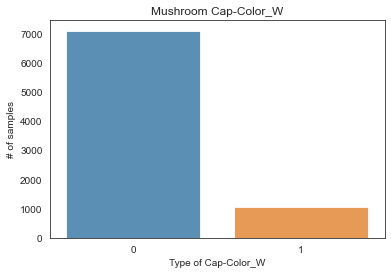

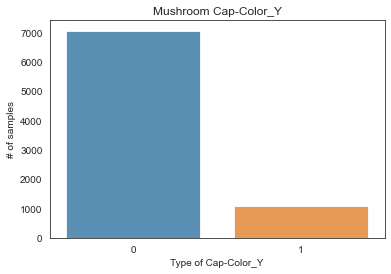

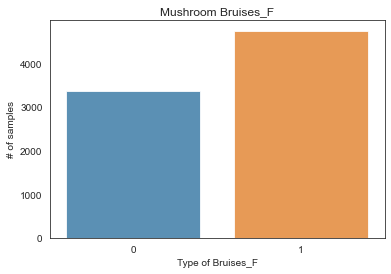

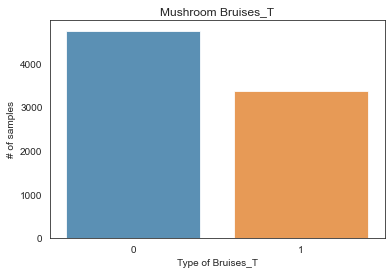

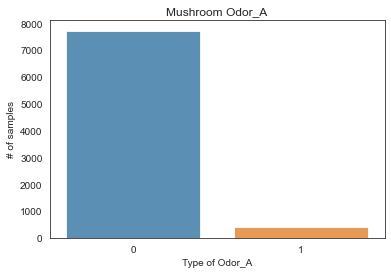

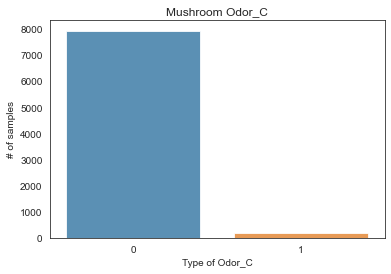

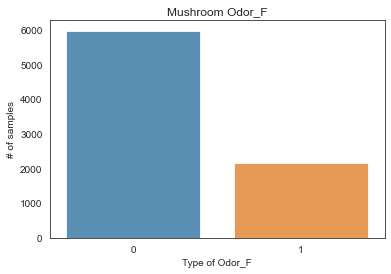

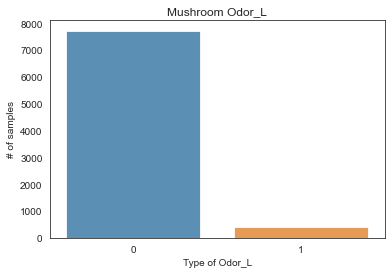

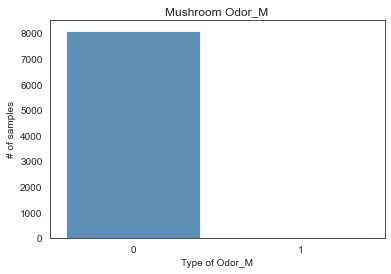

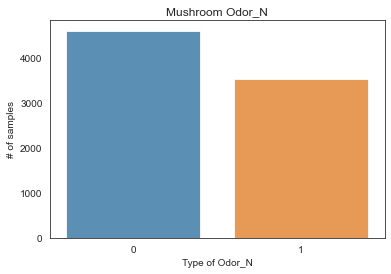

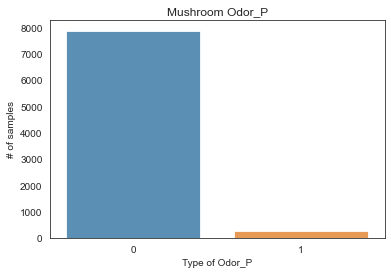

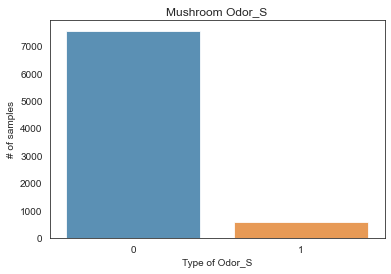

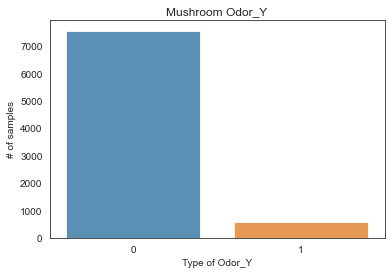

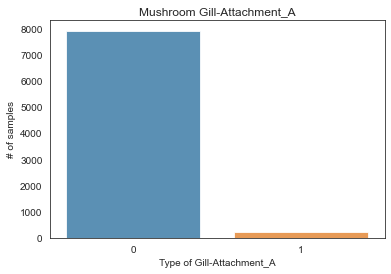

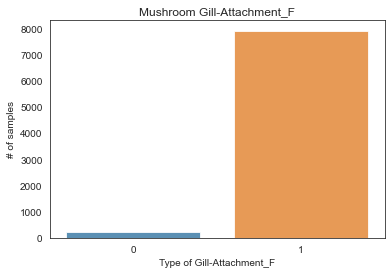

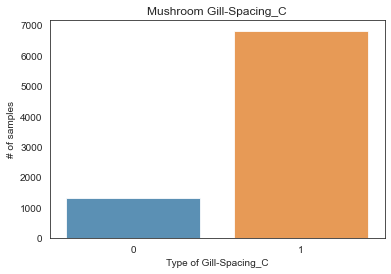

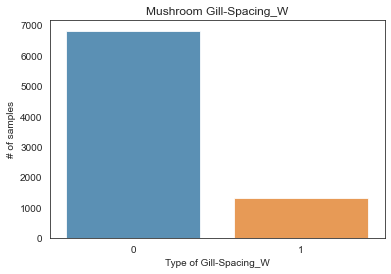

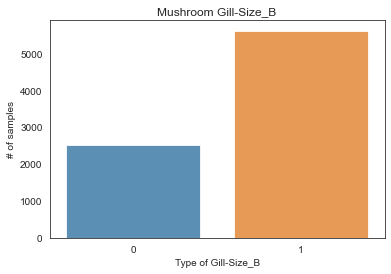

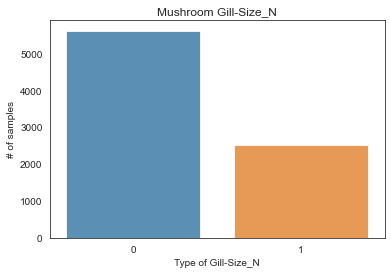

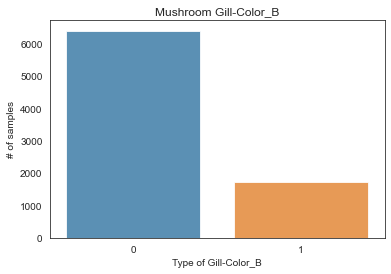

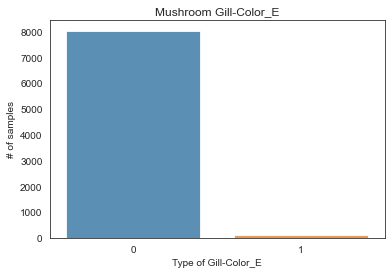

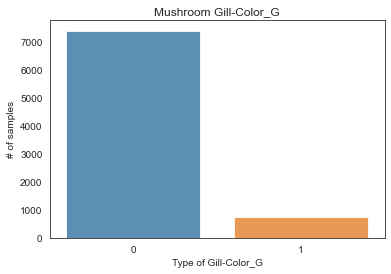

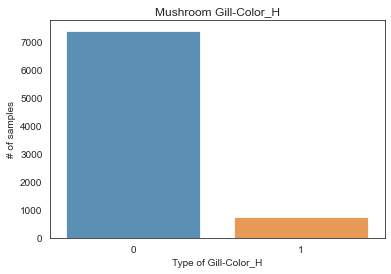

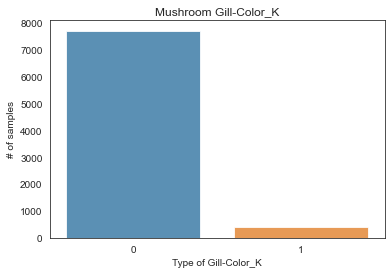

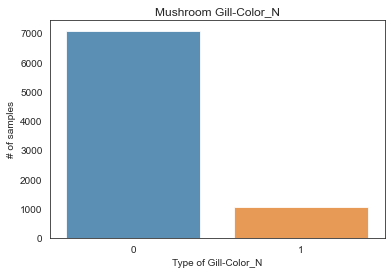

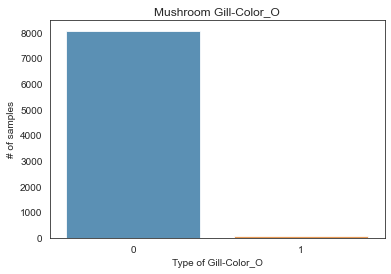

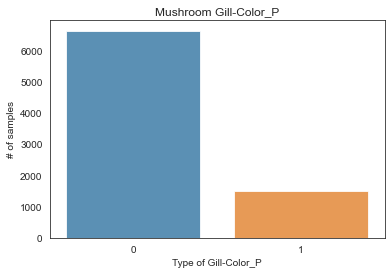

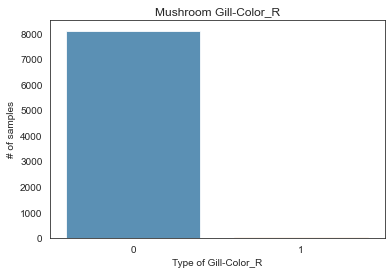

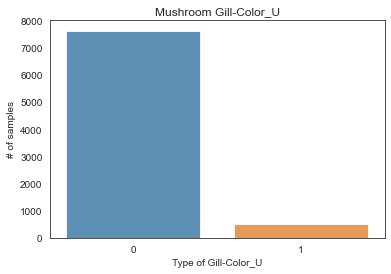

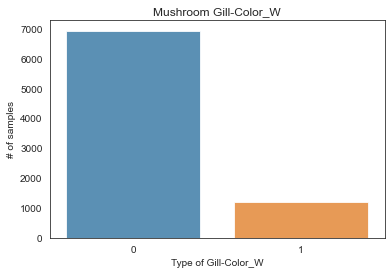

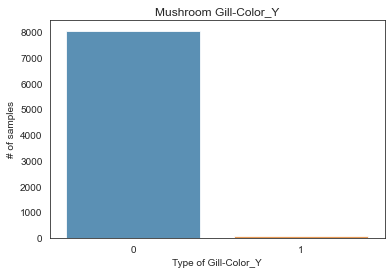

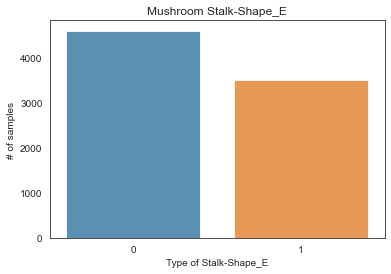

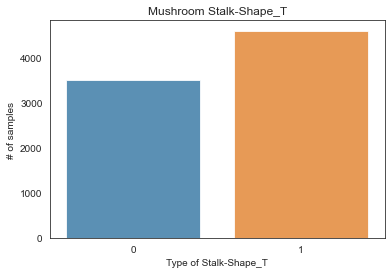

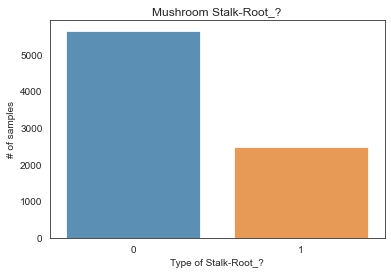

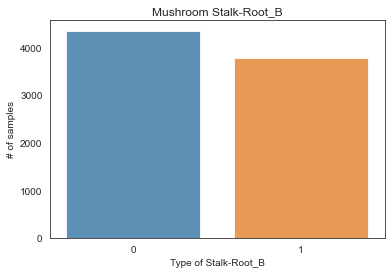

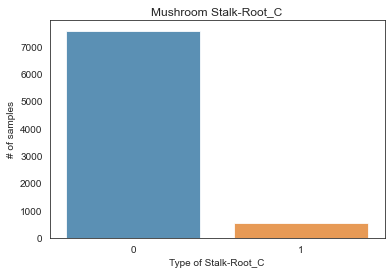

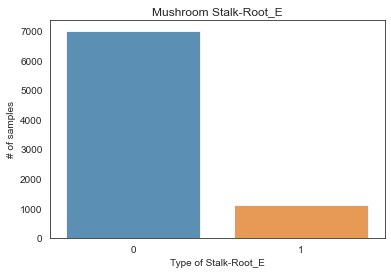

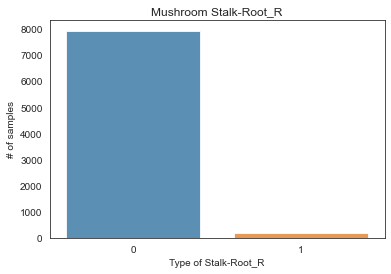

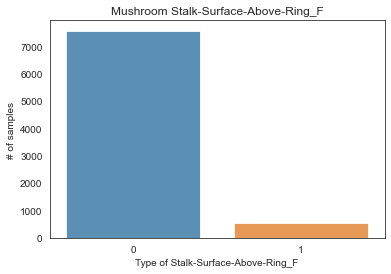

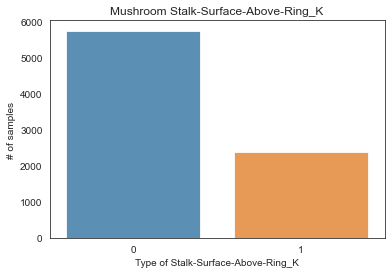

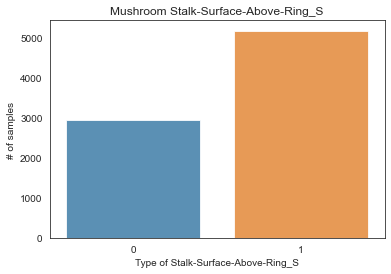

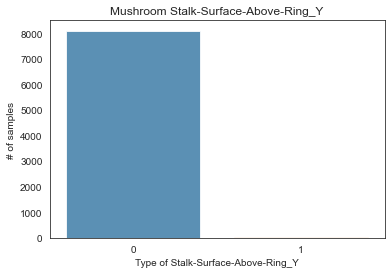

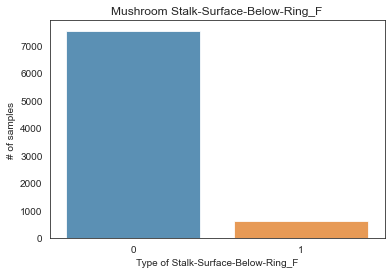

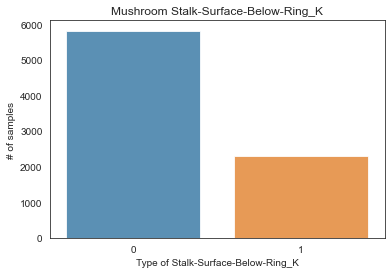

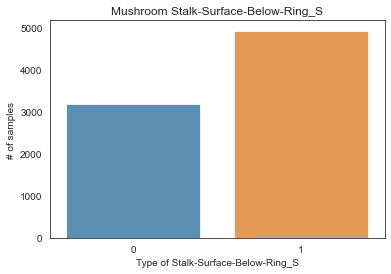

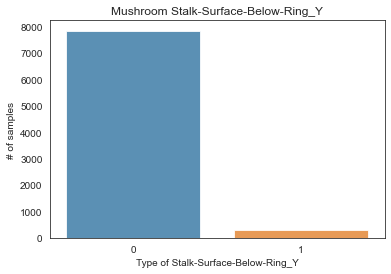

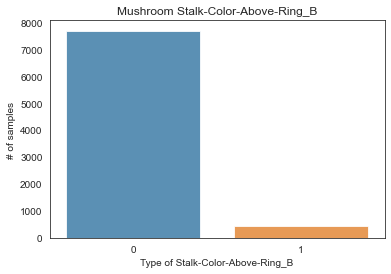

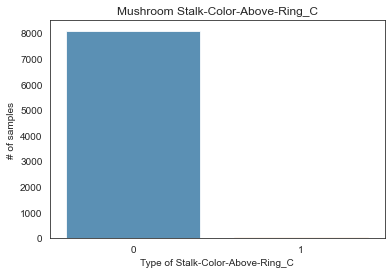

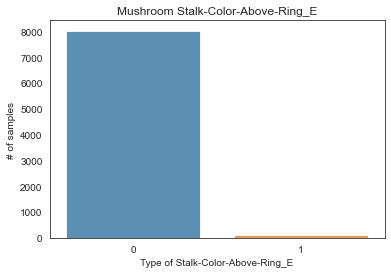

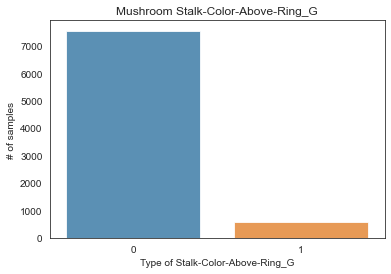

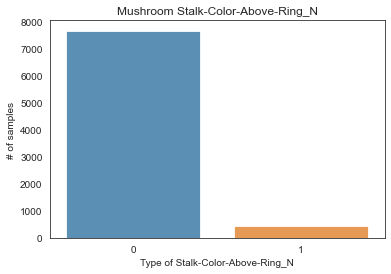

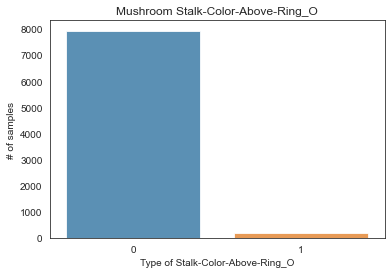

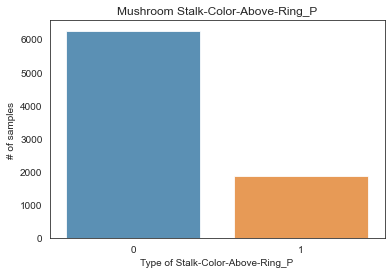

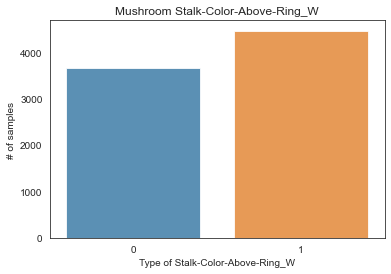

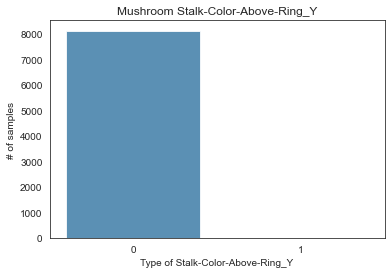

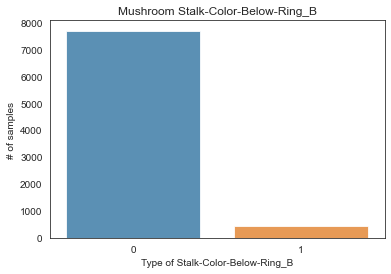

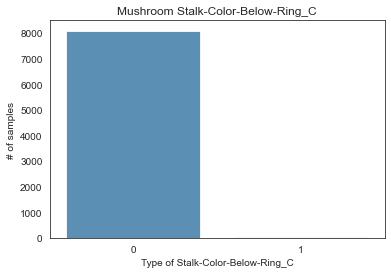

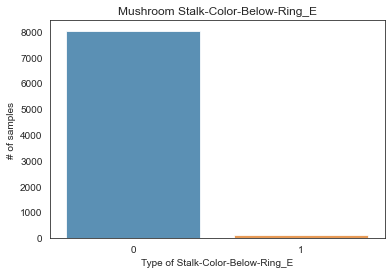

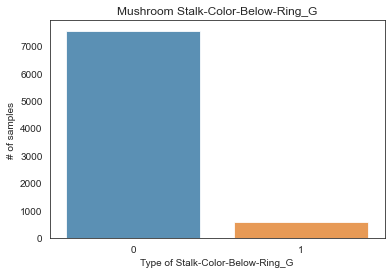

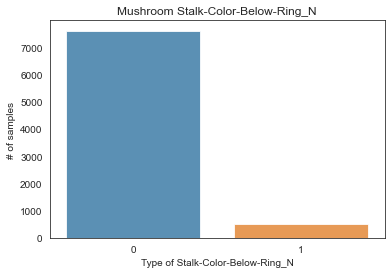

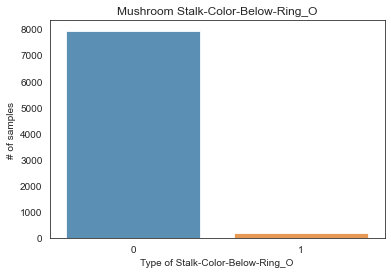

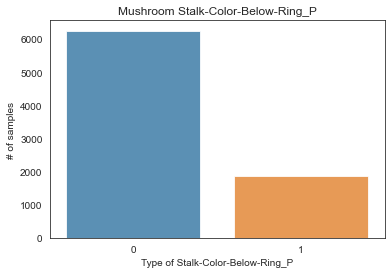

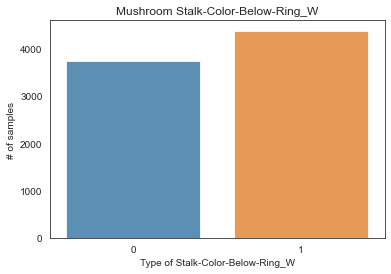

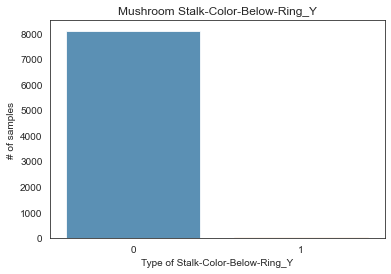

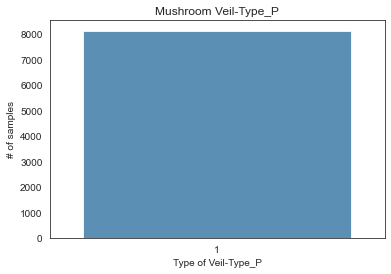

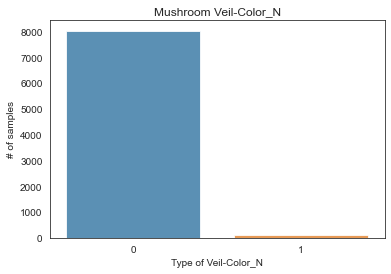

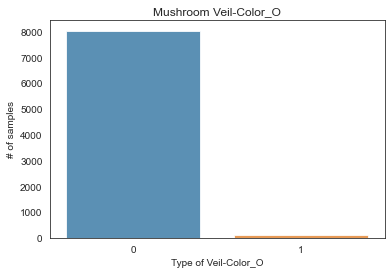

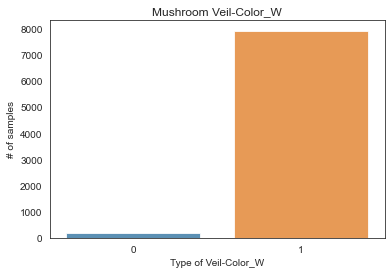

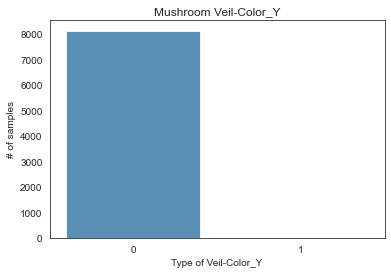

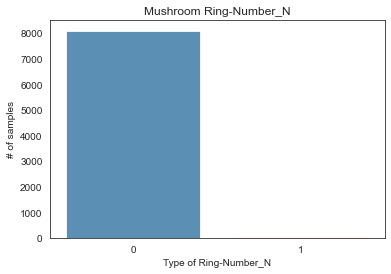

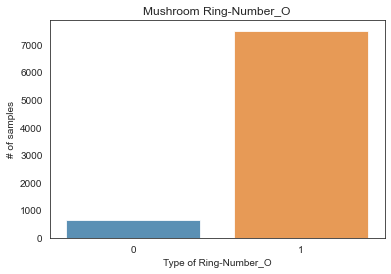

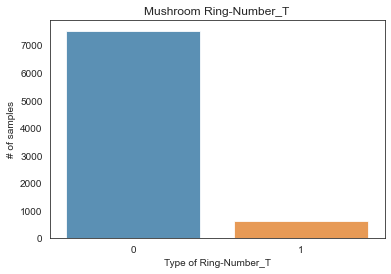

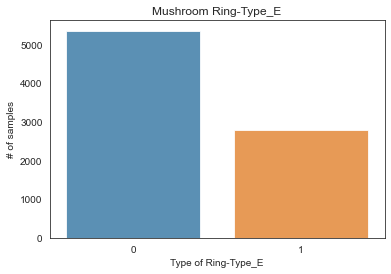

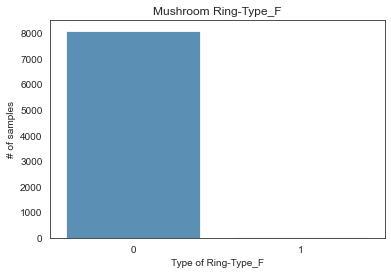

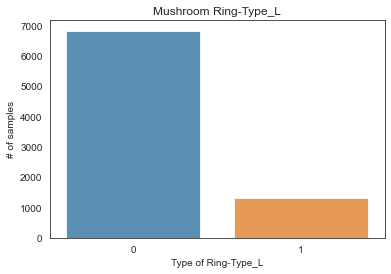

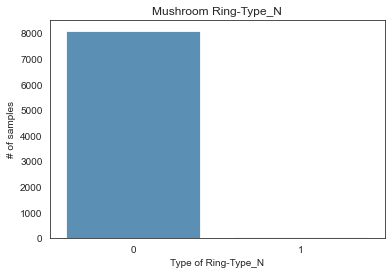

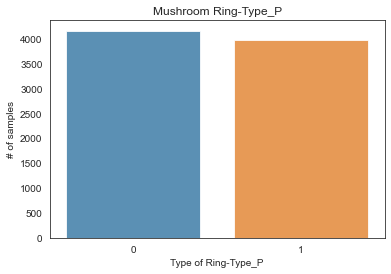

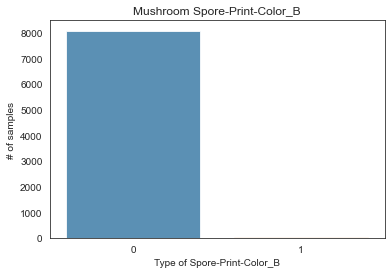

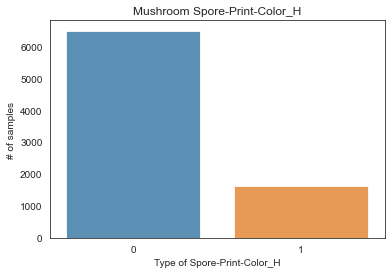

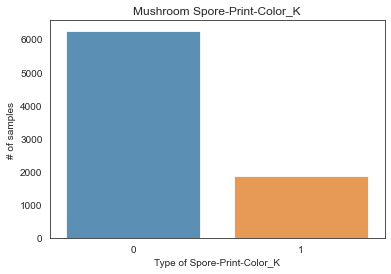

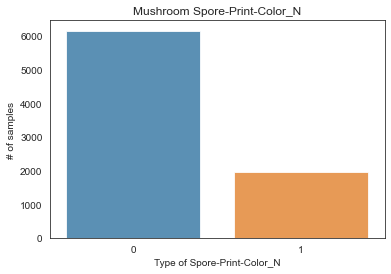

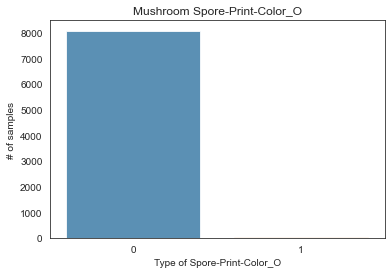

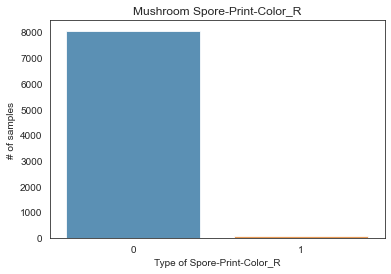

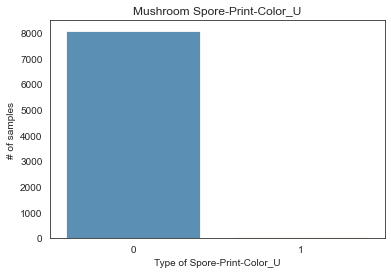

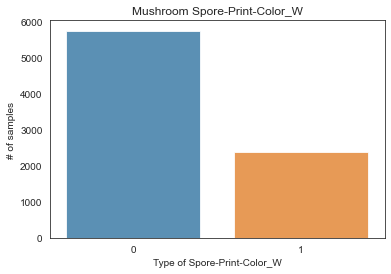

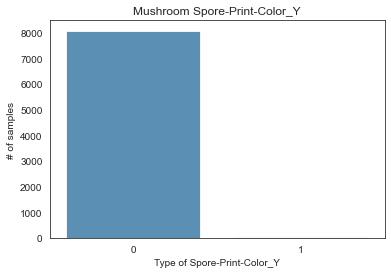

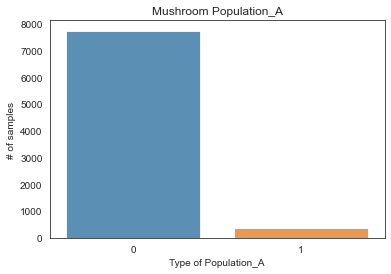

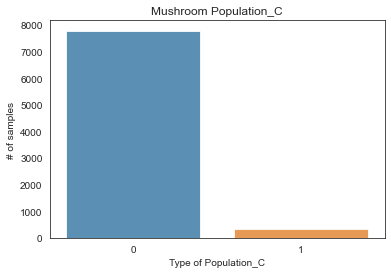

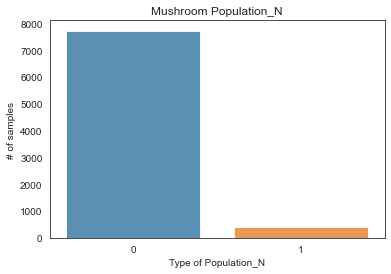

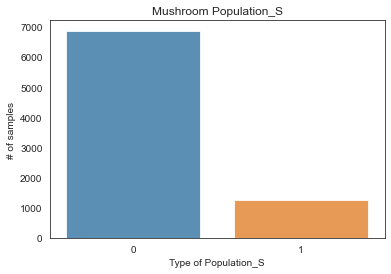

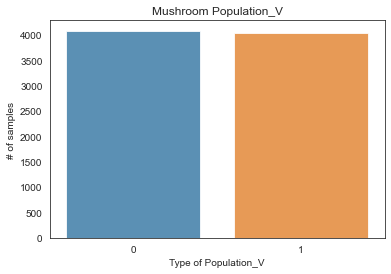

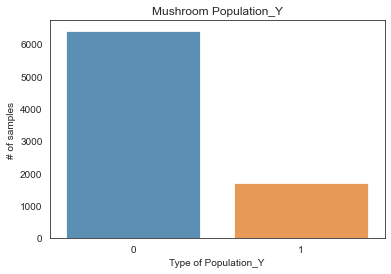

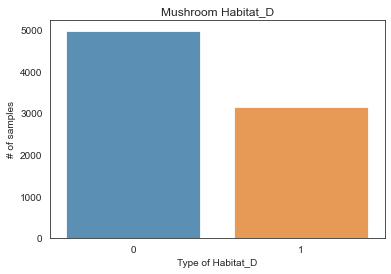

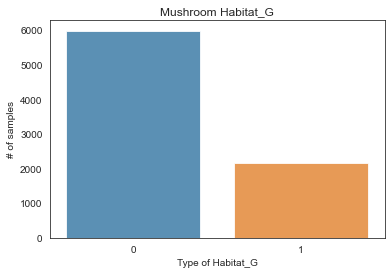

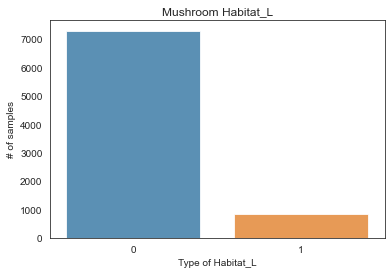

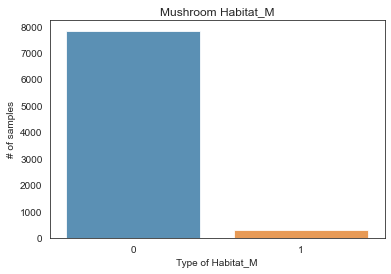

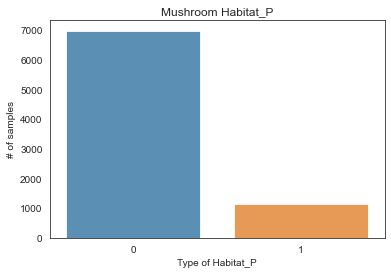

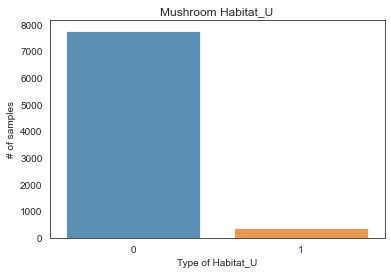

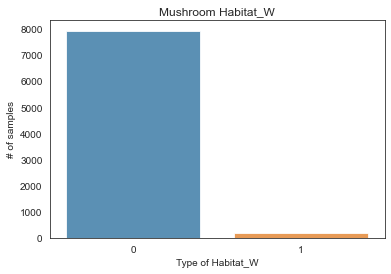

In [19]:
#barplots for each feature
#breakout of categories -> # of samples per value of each category 
#Habitat, mushroom gill color for examples
for col in features.columns:
    sns.set_style('white')
    plt.figure()
    sns.countplot(features[col],alpha =.80)
    plt.ylabel('# of samples')
    plt.title('Mushroom' + ' ' + col.title())
    plt.xlabel('Type of' + ' ' + col.title())
    

plt.show()

C:\Users\DEEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DEEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DEEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DEEL\anaconda3\lib\site-p

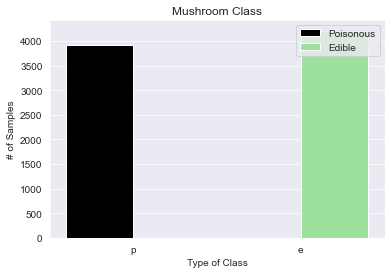

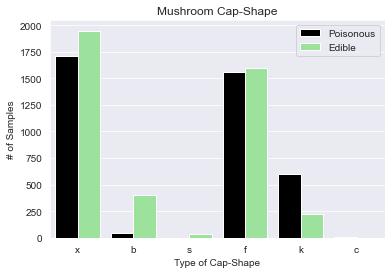

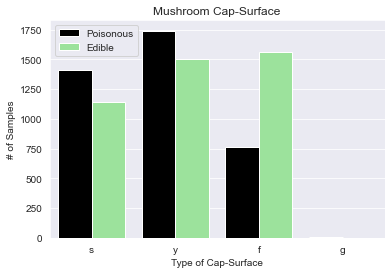

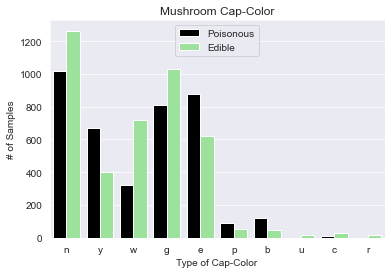

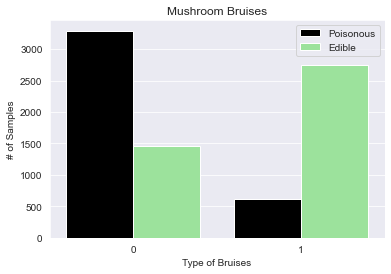

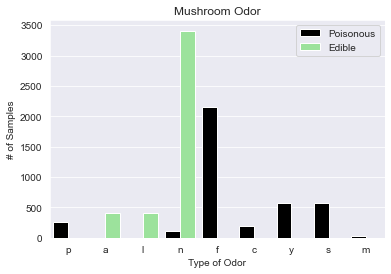

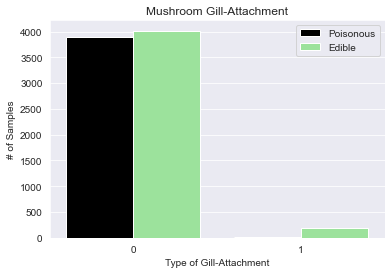

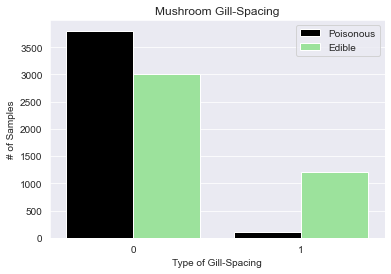

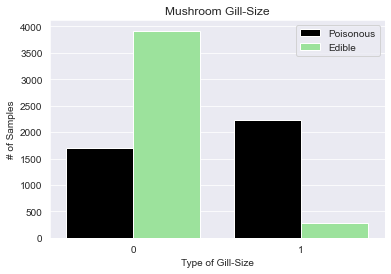

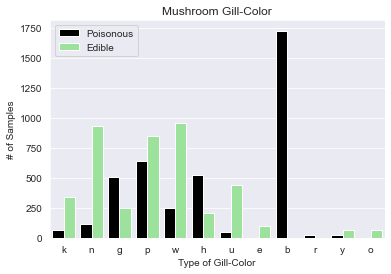

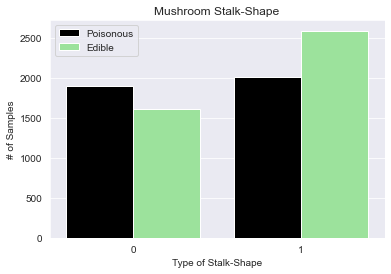

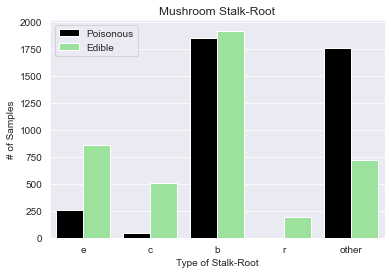

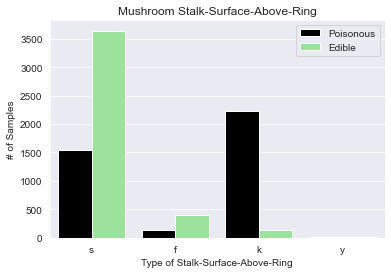

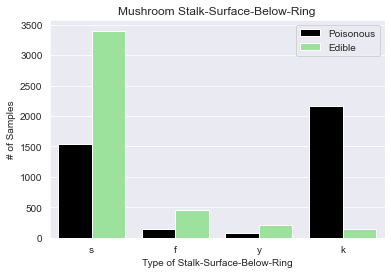

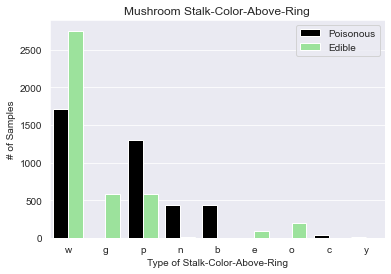

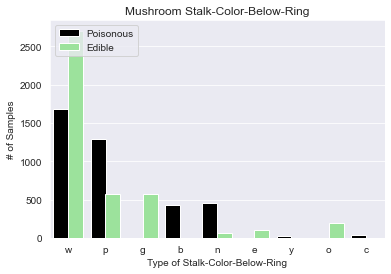

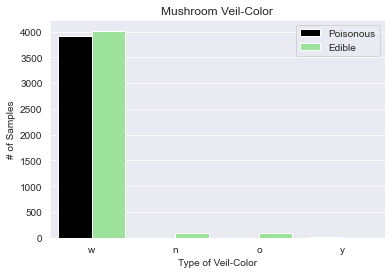

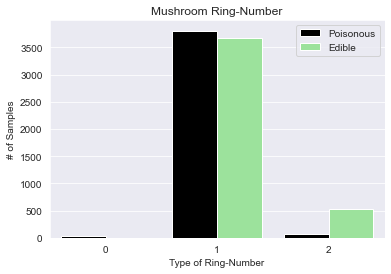

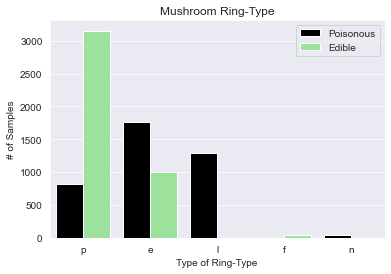

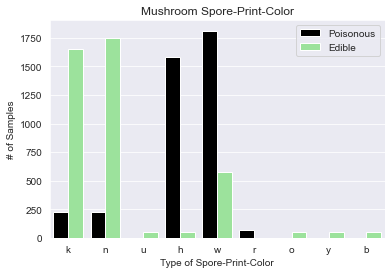

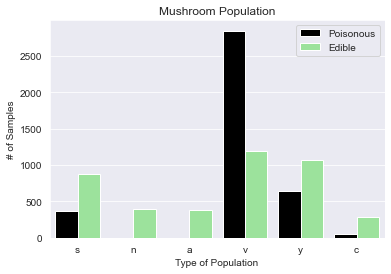

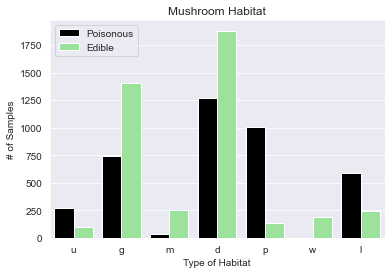

In [27]:
#population, gill color, ringtype, odor, surface above and below ring, spore-print color all have strong categories which point to poisonous/show seperation
#barplots for each feature/stacked with class
# # of mushrooms which are edible/poisonous based on category
#stalk shape not super insightful or veil color
for col in df:
    fig,ax = plt.subplots()
    sns.set_style('darkgrid')
    sns.countplot(col,hue=df['class'],palette=['black','lightgreen'],data=df)
    plt.ylabel('# of Samples')
    plt.xlabel('Type of' + ' ' + col.title())
    plt.title('Mushroom' + ' ' + col.title())
    plt.legend(title=None,labels=['Poisonous','Edible'])

In [20]:
#Split the dataset into training and testing, the 80% of the records are in the trainig set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size=0.2, random_state=0)

In [21]:
X_train.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
7434,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
7725,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
783,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1928,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
7466,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [22]:
X_test.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
380,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
3641,0,0,1,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
273,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1029,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
684,0,0,0,0,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [23]:
y_train.shape

(6499,)

In [24]:
y_test.shape

(1625,)

In [25]:
X_train.shape

(6499, 117)

In [26]:
X_test.shape

(1625, 117)

In [27]:
X_train.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
7434,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
7725,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
783,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1928,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
7466,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [28]:
from __future__ import absolute_import
from __future__ import print_function
import importlib
import itertools

In [30]:

#Train the predict pipeline


from sklearn.metrics import fbeta_score, f1_score,accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
   
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    results['train_time'] = end - start
        
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    results['pred_time'] = end - start
            
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    results['f_train'] = fbeta_score(y_train[:300],predictions_train, beta=0.5)
        
    results['f_test'] = fbeta_score(y_test,predictions_test, beta=0.5)
       
    #print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    
    return results


In [31]:
#Model Training
from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

clf_A = GaussianNB()
clf_B = RandomForestClassifier()
clf_C = KNeighborsClassifier()

training_length = len(X_train)
samples_1 = int(training_length * 0.01)
samples_10 = int(training_length * 0.1)
samples_100 = int(training_length * 1)

results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

In [32]:
results

{'GaussianNB': {0: {'train_time': 0.005712270736694336,
   'pred_time': 0.04947066307067871,
   'acc_train': 0.8433333333333334,
   'acc_test': 0.88,
   'f_train': 0.8062645011600929,
   'f_test': 0.8390830180280435},
  1: {'train_time': 0.015981435775756836,
   'pred_time': 0.04131627082824707,
   'acc_train': 0.93,
   'acc_test': 0.9396923076923077,
   'f_train': 0.8968058968058968,
   'f_test': 0.907916373032652},
  2: {'train_time': 0.031214475631713867,
   'pred_time': 0.03276801109313965,
   'acc_train': 0.9566666666666667,
   'acc_test': 0.9667692307692307,
   'f_train': 0.9335038363171355,
   'f_test': 0.9470717961283998}},
 'RandomForestClassifier': {0: {'train_time': 0.4160325527191162,
   'pred_time': 0.07938408851623535,
   'acc_train': 0.9533333333333334,
   'acc_test': 0.9532307692307692,
   'f_train': 0.9750733137829911,
   'f_test': 0.9786576804268465},
  1: {'train_time': 0.5053219795227051,
   'pred_time': 0.09565567970275879,
   'acc_train': 1.0,
   'acc_test': 1.0,


In [33]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
#As a Bonus we can now see features which determine more whether its edible or not

z = sorted(zip(clf.feature_importances_,X_train.columns),reverse=True)

z[:6]

[(0.12209907786541736, 'odor_n'),
 (0.0746584624462654, 'gill-size_b'),
 (0.05769423125902882, 'gill-size_n'),
 (0.057138698076195024, 'odor_f'),
 (0.05245859989258022, 'stalk-surface-above-ring_k'),
 (0.048098989519150585, 'spore-print-color_h')]

In [35]:
#Saving Model to disk

from joblib import dump, load
dump(clf, 'mushrooms.joblib')

['mushrooms.joblib']

In [36]:
#Saving Model to disk

from joblib import dump, load
dump(results, 'mushrooms_result.joblib')

['mushrooms_result.joblib']

In [37]:
#Saving Model to disk

from joblib import dump, load
dump(z, 'mushrooms_f_importances.joblib')

['mushrooms_f_importances.joblib']

<AxesSubplot:>

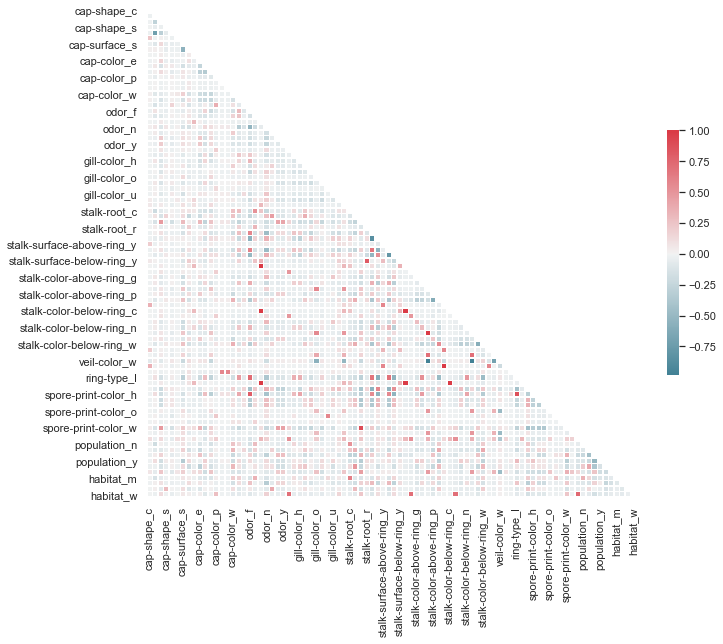

In [41]:
sns.set(style="white")


# Compute the correlation matrix
corr = df_final.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

C:\Users\DEEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


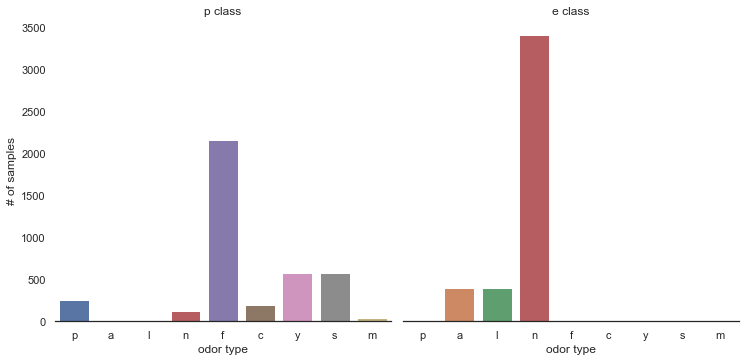

In [44]:
#more visualizations using catplot
g=sns.catplot('odor',col='class',data=df,kind='count',col_wrap=4)
g.set_axis_labels("odor type", "# of samples")
g.set_titles("{col_name} {col_var}")
g.despine(left=True)

C:\Users\DEEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


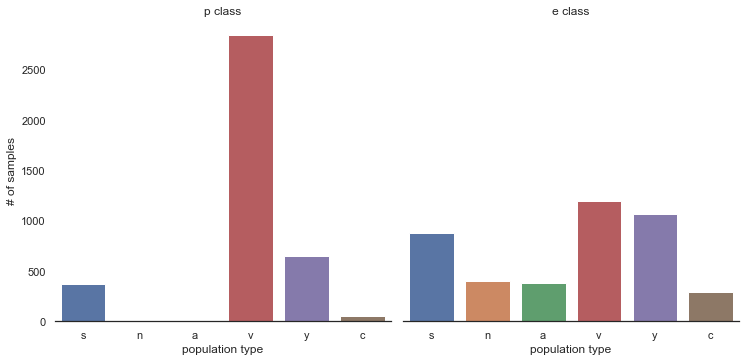

In [45]:
g=sns.catplot('population',col='class',data=df,kind='count',col_wrap=4)
g.set_axis_labels("population type", "# of samples")
g.set_titles("{col_name} {col_var}")
g.despine(left=True)

C:\Users\DEEL\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DEEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


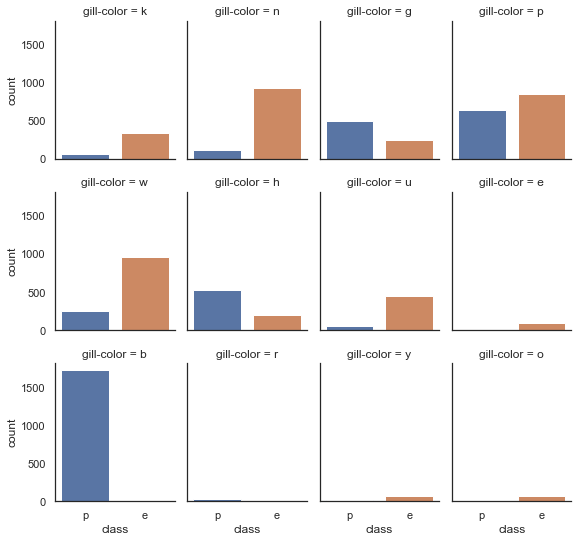

In [46]:
sns.factorplot('class',col='gill-color',data=df1,kind='count',height=2.5,aspect=.8,col_wrap=4)